#Análisis de la distribución de tiempos de escape en una celda del sistema tipo billar-disco duro

La distribución de tiempos de escape para la partícula puntual en una celda del si tipo billar-disco duro puede ser entendida en términos de la función cumulativa $F(t_{escape})$, la cual da la probabilidad de que al tiempo $t$ la partícula haya escapado. Si reinterpretamos esto en términos de la función cumulativa complementaria ($F^C$)

$$P_s(t) := F^C(t_{escape}) = 1 - F(t_{escape})$$,

donde $P_s(t)$ es llamada probabilidad de supervivencia, esto es, la probabilidad de que al tiempo $t$ la partícula no haya escapado.

Para el estudio que sigue se considerará una ensamble de $10^7$ con condiciones iniciales aleatorias (a $t = 0$) tomadas mediante un muestreo microcanónico con energía total igual a $1$.


In [1]:
using HDF5
using StatsBase
using PyPlot

In [51]:
file = h5open("HDF5/10millones.hdf5")
tdata = read(file["tdata/"]);

In [52]:
tdata = sort(tdata) #Descarto los últimos datos más grandes para hacer pruebas
empirica = ecdf(tdata) #Función cumulativa empírica. El método ecdf regresa una función que
#se aplica sobre el intervalo de datos.


ef (generic function with 2 methods)

In [53]:
max = findmax(tdata)[1];
intervalo = [0.:0.01:max];

In [54]:
Ps = 1 - empirica(intervalo)  #Probabilidad de supervivencia;

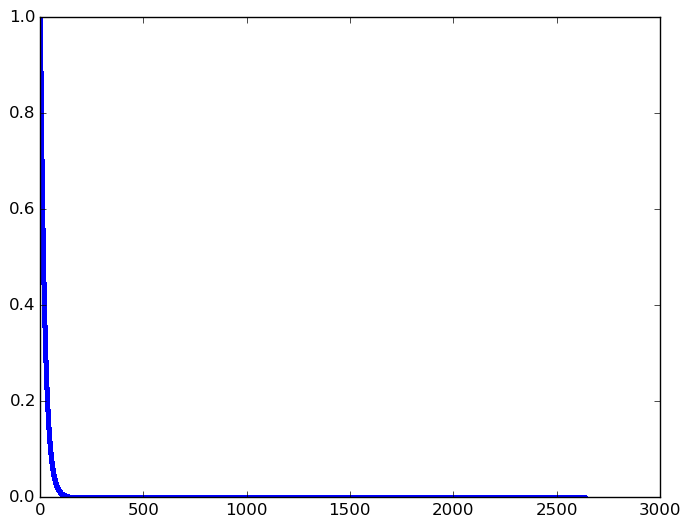

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f188bf13dd0>

In [58]:
plot(intervalo, Ps, ".--")

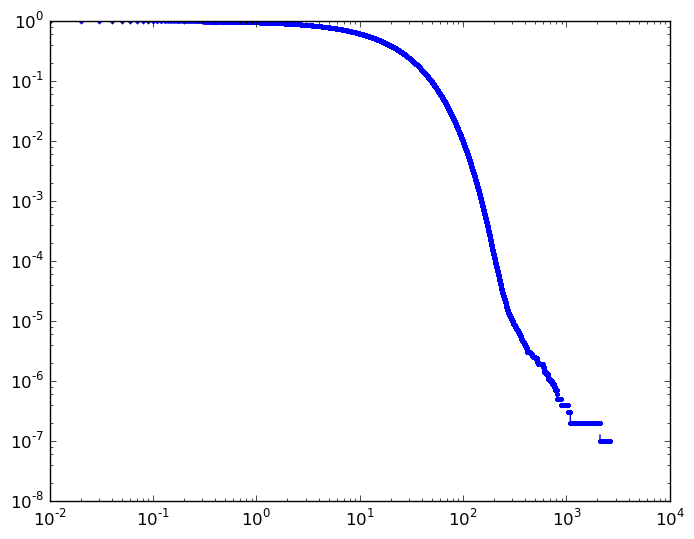

In [55]:
plot(intervalo, Ps, ".--")
plt.gca()[:set_yscale]("log")
plt.gca()[:set_xscale]("log")
#plot(intervalo, 1 ./intervalo.^3)

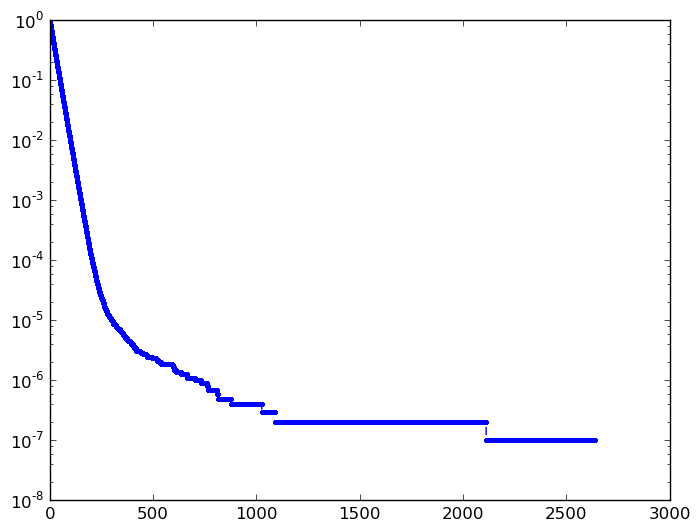

In [7]:
plot(intervalo, Ps, ".--")
plt.gca()[:set_yscale]("log")

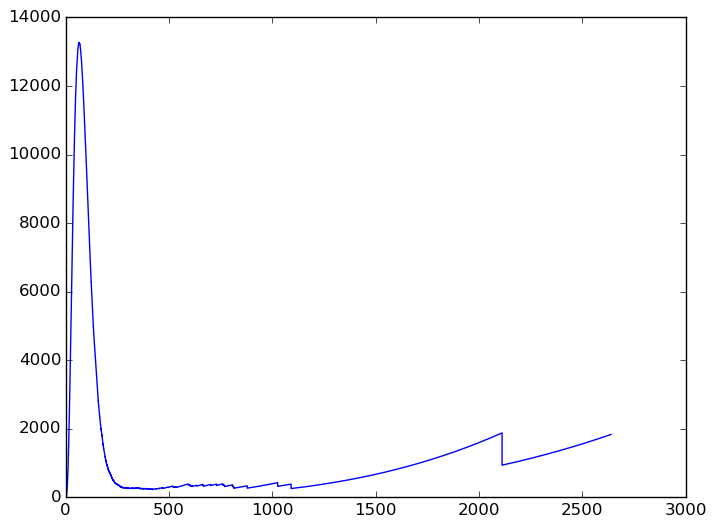

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f18838dff10>

In [8]:
plot(intervalo, Ps .* intervalo.^3 , "-")
#plt.gca()[:set_xlim](200,2500)
#plt.gca()[:set_ylim](0,0.01)


In [9]:
tdata = tdata[end-10000:end];

In [10]:
using PyCall
using Distributions

In [11]:
@pyimport powerlaw
@pyimport plfit

###Estudiaremos la distribución de Pareto con ambos modulos

In [12]:
a = [1.:0.01:10.;];

In [13]:
dist = Pareto()

Distributions.Pareto(α=1.0, β=1.0)

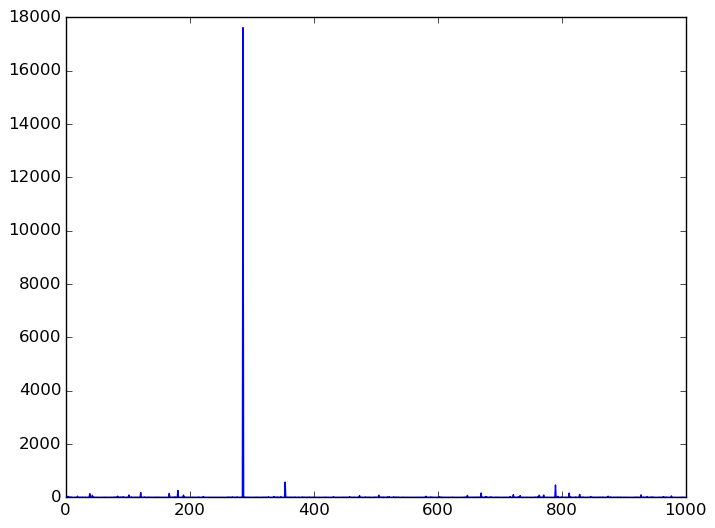

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f188d47c990>

In [14]:
numbers = rand(dist, 1000);
plot(numbers)
#plt.gca()[:set_yscale]("log")
#plt.gca()[:set_xscale]("log")

In [15]:
mycdf = ecdf(numbers)

ef (generic function with 2 methods)

 in depwarn at ./deprecated.jl:40
 in oldstyle_vcat_warning at ./abstractarray.jl:26
 in vect at abstractarray.jl:29
 in include_string at loading.jl:98
 in execute_request_0x535c5df2 at /home/maquinadt/.julia/v0.4/IJulia/src/execute_request.jl:157
 in eventloop at /home/maquinadt/.julia/v0.4/IJulia/src/IJulia.jl:123
 in anonymous at task.jl:361


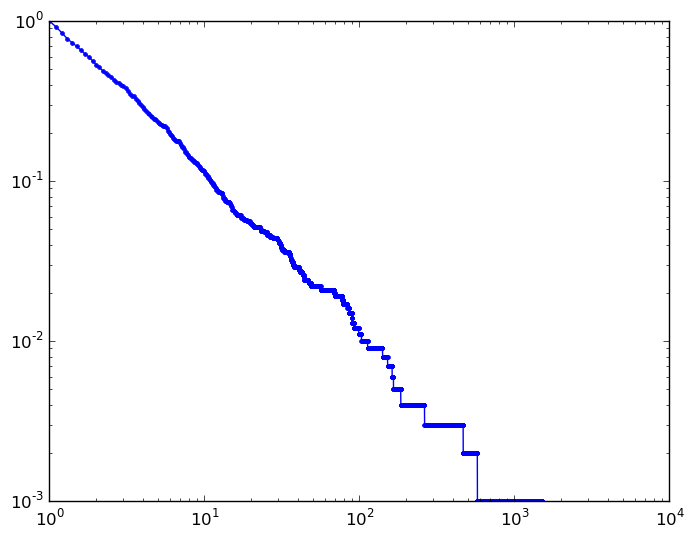

In [16]:
a = [1:0.1:1500];
plot(a, 1.- mycdf(a), ".-")
plt.gca()[:set_yscale]("log")
plt.gca()[:set_xscale]("log")

In [17]:
my = plfit.plfit(numbers);

PYTHON plfit executed in 0.148640 seconds
xmin: 1.00319 n(>xmin): 1000 alpha: 1.92403 +/- 0.0292204   Log-Likelihood: -2164.41   ks: 0.0307974 p(ks): 0.299035


/usr/local/lib/python2.7/dist-packages/plfit/plfit.py:118: RuntimeWarning: divide by zero encountered in double_scalars
  a = 1+float(n) / sum(log(x/xmin))


Interpretando los resultados anteriores, se tiene una potencia de aproximadamente $2$, un $xmin$ de $1.52$ y un valor de $p$ cercano a $1$, parámetros que permiten que la hipótesis nula (la distribución es una ley de potencias) no sea rechazada.}

In [18]:
f = powerlaw.Fit(numbers);

Calculating best minimal value for power law fit
/usr/local/lib/python2.7/dist-packages/powerlaw.py:693: RuntimeWarning: invalid value encountered in divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [19]:
f[:power_law][:alpha]

1.9240299317756326

In [20]:
f[:power_law][:xmin]

1.003191218285806

In [21]:
f[:distribution_compare]("power_law","exponential")

/usr/local/lib/python2.7/dist-packages/powerlaw.py:693: RuntimeWarning: divide by zero encountered in divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(2018.0500657800803,0.004780074143855702)

Claramente la distribución no es una exponencial, el valor de $R$ (primera entrada) lo sugiere y el valor de $p$ (cercano a $0$ lo confirma).

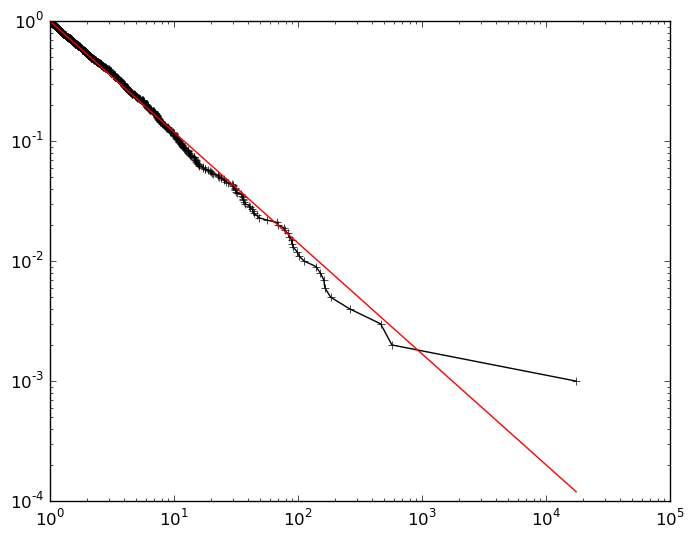

In [22]:
my[:plotcdf]()

##Analizando los tiempos de escape

In [23]:
mycdf = ecdf(tdata)
myplfit = plfit.plfit(tdata);

PYTHON plfit executed in 8.790689 seconds
xmin: 150.561 n(>xmin): 10001 alpha: 8.17519 +/- 0.0717483   Log-Likelihood: -41835.3   ks: 0.0146078 p(ks): 0.0280141


El bajo valor de $p$ $(<0.1)$ sugiere rechazar la hipótesis nula: la distribución no es una ley de potencias.

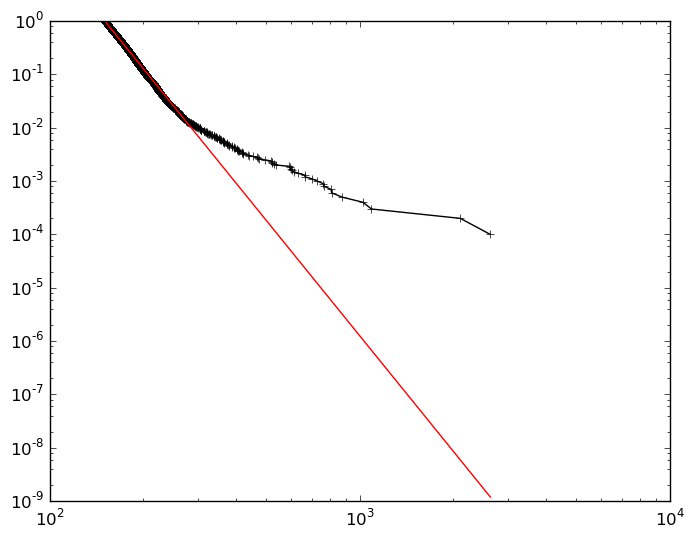

In [24]:
myplfit[:plotcdf]()

In [25]:
f = powerlaw.Fit(tdata);

Calculating best minimal value for power law fit


In [26]:
f[:power_law][:alpha]

8.17519074960899

In [27]:
f[:power_law][:xmin]

150.56095985613592

Como se ve hay mucha diferencia entre los dos métodos, diferencia que puede reducirse descartando los últimos cinco datos. Pero no es claro si se sigue una ley de potencias de todas maneras. Además de esto, el exponente sería $-8$ lo cual no corresponde al sentido físico que se le da a la "cola larga"

In [28]:
f[:distribution_compare]("power_law","exponential")

(454.9685151751364,2.2070785206655617e-5)

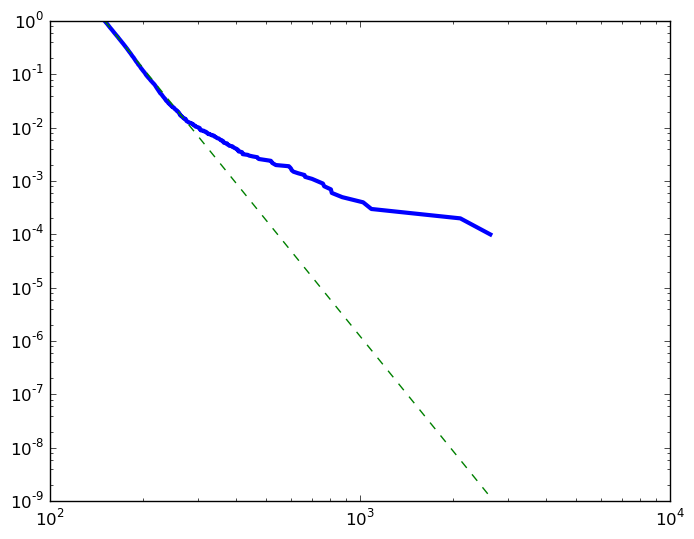

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f188ceae310>

In [29]:
f[:plot_ccdf](linewidth=3)
f[:power_law][:plot_ccdf](linestyle="--")

###Ajuste a una exponencial

In [30]:
tdata = read(file["tdata/"])
#tdata = tdata[1:10000] #Escojo 10000 puntos;

In [31]:
mydis = ecdf(tdata)
x = [findmin(tdata)[1]:0.01:findmax(tdata)[1]];

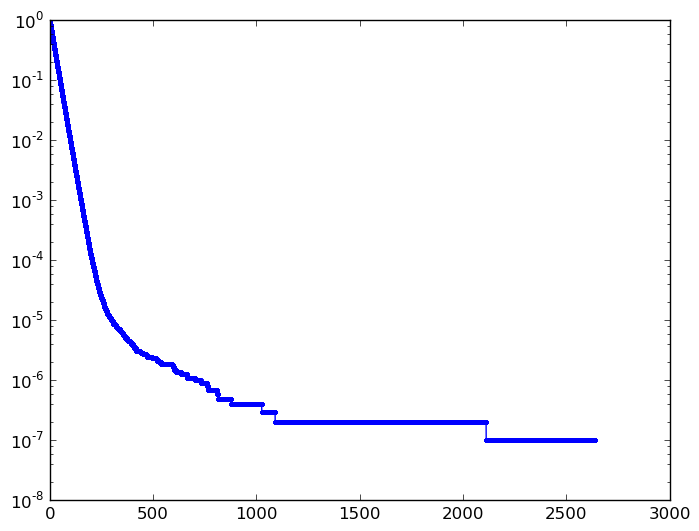

In [32]:
plot(x,1.-mydis(x),".-")
#plt.gca()[:set_xscale]("log")
plt.gca()[:set_yscale]("log")

In [33]:
dis = fit_mle(Exponential,tdata)

Distributions.Exponential(β=21.247255594826918)

In [34]:
b = dis.β;
d_estimada(x) = 1/b*exp(-x/b)
cumdf(x) = (1 - exp(-x/b))
survival(x) = exp(-x/b);

In [35]:
b

21.247255594826918

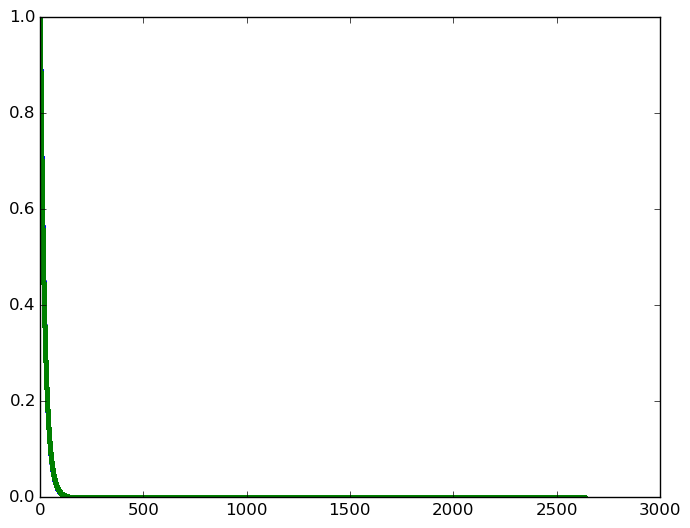

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f188c9c4550>

In [36]:
plot(x,survival(x), ".--")
plot(x,1.-mydis(x),".-")


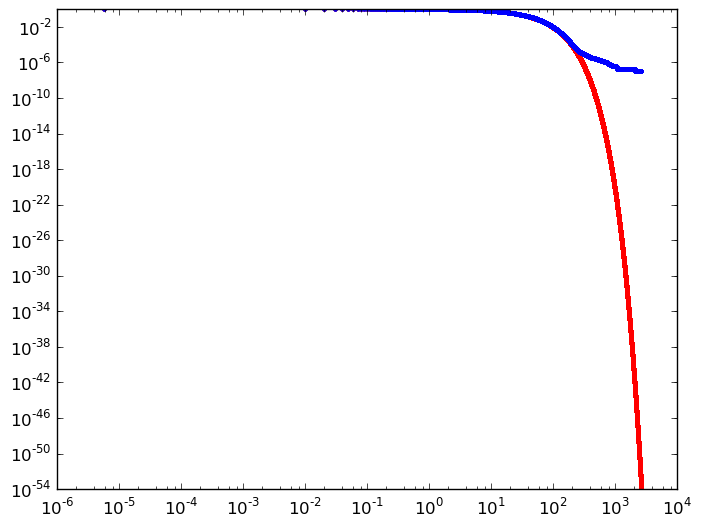

In [57]:
plot(x,survival(x), "r.--")
plot(x,1.-mydis(x),".-")
plt.gca()[:set_yscale]("log")
plt.gca()[:set_xscale]("log")